# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [1]:
import pandas as pd
%matplotlib inline


In [2]:
df = pd.read_csv("/data/311_Service_Requests_from_2010_to_Present.csv", error_bad_lines=False)
# df.head()


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(1844278, 53)

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [4]:
%time df = pd.read_csv("/data/311_Service_Requests_from_2010_to_Present.csv", error_bad_lines=False)
# df.head()


<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 30.2 s, sys: 5.14 s, total: 35.3 s
Wall time: 36.2 s


### Look at the first few rows

Make sure you can see **every single column.**

In [5]:
pd.set_option('display.max_columns', 65)
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [6]:
df_columns = pd.read_csv("/data/311_Service_Requests_from_2010_to_Present.csv", error_bad_lines=False, usecols=['Created Date','Closed Date','Agency','Complaint Type','Descriptor','Borough'])


In [7]:
df_columns.head()


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [8]:
%time pd.to_datetime(df_columns['Created Date'].head(10000))


CPU times: user 2.61 s, sys: 4.85 ms, total: 2.62 s
Wall time: 2.62 s


0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

In [9]:
%time pd.to_datetime(df_columns['Created Date'].head(10000), format="%m/%d/%Y %H:%M:%S %p")


CPU times: user 59 ms, sys: 1.29 ms, total: 60.3 ms
Wall time: 61.5 ms


0      2015-09-04 10:55:25
1      2015-09-04 01:53:45
2      2015-09-04 09:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 07:56:42
9      2015-09-04 09:04:42
10     2015-09-04 08:26:09
11     2015-09-04 11:07:15
12     2015-09-04 10:23:59
13     2015-09-04 11:16:12
14     2015-09-04 04:49:55
15     2015-09-04 02:39:46
16     2015-09-04 08:21:22
17     2015-09-04 11:34:23
18     2015-09-04 09:55:19
19     2015-09-04 11:44:07
20     2015-09-04 08:12:10
21     2015-09-04 11:14:40
22     2015-09-04 08:17:20
23     2015-09-04 10:54:59
24     2015-09-04 03:45:14
25     2015-09-04 11:48:20
26     2015-09-05 01:53:40
27     2015-09-04 11:34:47
28     2015-09-04 11:37:52
29     2015-09-04 11:01:37
               ...        
9970   2015-09-07 01:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [10]:
%time df_columns['created_at'] = pd.to_datetime(df_columns['Created Date'], format="%m/%d/%Y %H:%M:%S %p")


CPU times: user 10.1 s, sys: 74.7 ms, total: 10.2 s
Wall time: 10.1 s


In [11]:
%time df_columns['closed_at'] = pd.to_datetime(df_columns['Closed Date'], format="%m/%d/%Y %H:%M:%S %p")


CPU times: user 9.81 s, sys: 65.4 ms, total: 9.88 s
Wall time: 9.82 s


### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [12]:
df_columns.head()


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 10:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 01:53:45,2015-09-04 06:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 09:15:43,2015-09-04 10:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 05:21:18


In [13]:
df_columns.dtypes


Created Date              object
Closed Date               object
Agency                    object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [14]:
df_columns['Agency'].value_counts()


NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

"Complaint Type" :
Full Agency name of responding City Government Agency
Data Type : Text
API Field Name : complaint_type
source : https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview
    
"Descriptor"
This is associated to the Complaint Type, and provides further detail on the incident or condition.
Descriptor values are dependent on the Complaint Type, and are not always required in SR.
Data Type : Text
API Field Name : Descriptor
source : https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview


## What are the most popular categories of complaints for the NYPD? For the DOT?

In [15]:
df_columns[df_columns['Agency']=='NYPD']['Complaint Type'].value_counts().head()


Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

In [16]:
df_columns[df_columns['Agency']=='DOT']['Complaint Type'].value_counts().head()


Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [17]:
df_columns[df_columns['Complaint Type']=='Street Condition']['Descriptor'].value_counts().head()


Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [18]:
df_columns[df_columns['Complaint Type']=='Noise - Residential']['Descriptor'].value_counts().head()


Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [19]:
df_columns.set_index('created_at', inplace = True)


In [20]:
df_columns.index.month.value_counts().sort_index()


1     126501
2     128303
3     165711
4     158139
5     180530
6     176301
7     160381
8     157008
9     162468
10    150475
11    135985
12    142476
Name: created_at, dtype: int64

## Plot how many requests were filed each month

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


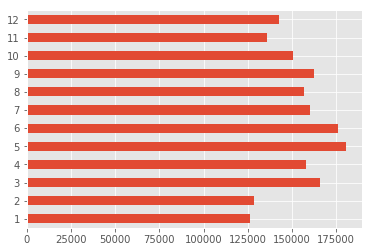

In [22]:
df_columns.index.month.value_counts().sort_index().plot(kind='barh')


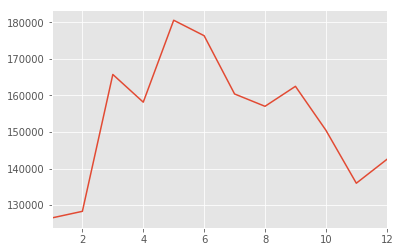

In [23]:
df_columns.index.month.value_counts().sort_index().plot()


# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [24]:
# summer : 5,6,7
df_columns[df_columns.index.month.isin([5,6,7])]['Complaint Type'].value_counts().head()


Noise - Residential       124257
Illegal Parking            57975
Street Condition           55901
Blocked Driveway           53758
Street Light Condition     47765
Name: Complaint Type, dtype: int64

In [25]:
# winter : 11,12,1
df_columns[df_columns.index.month.isin([11,12,1])]['Complaint Type'].value_counts().head()


Noise - Residential       98907
Blocked Driveway          59208
Illegal Parking           52777
Street Light Condition    43737
Street Condition          35838
Name: Complaint Type, dtype: int64

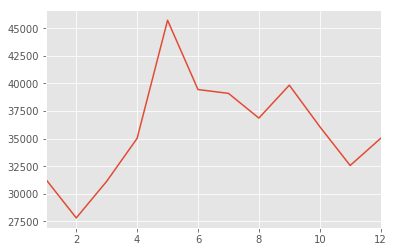

In [26]:
df_columns[df_columns['Complaint Type'] == 'Noise - Residential'].index.month.value_counts().sort_index().plot()


In [27]:
# df_columns[df_columns['Complaint Type'] == 'Blocked Driveway'].index.month.value_counts().sort_index().plot()
# Blocked Driveway, Illegal Parking, Street Light Condition, Street Condition


These 'Complaint Type's have no cycles. There the main reason for the cycle of complaints increasing in summer and decreasing in winter, is because the complaints about 'Noise - Residential' increases in summer and decreases in winter.

## Time of day

### What time of day do people complain?

In [28]:
df_columns['Hour of day'] = df_columns['Created Date'].str.extract(r"(\d\d):\d\d:\d\d", expand=False)
df_columns['AM|PM'] = df_columns['Created Date'].str.extract(r"(AM|PM)", expand=False)


In [29]:
df_columns.head()


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at,Hour of day,AM|PM
created_at,,,,,,,,,
2015-09-04 10:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54,10,PM
2015-09-04 01:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 06:37:24,01,PM
2015-09-04 09:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 10:32:01,09,PM
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43,01,AM
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 05:21:18,07,AM


In [30]:
df_columns.groupby(["Hour of day","AM|PM"]).size().reset_index().sort_values([0], ascending=[False])
# people usually complain on or after 11 PM and before 12 PM


,Hour of day,AM|PM,0
21,11,PM,126255
19,10,PM,122247
20,11,AM,105907
17,09,PM,104174
22,12,AM,100359
3,02,PM,98868
18,10,AM,95761
23,12,PM,92583
5,03,PM,89844
15,08,PM,89115


### What time of day do people complain about potholes?

In [31]:
df_columns[ ~df_columns['Descriptor'].isnull() & df_columns['Descriptor'].str.contains('Pothole') ].groupby(["Hour of day","AM|PM"]).size().reset_index().sort_values([0], ascending=[False])
# people usually complain about potholes on or after 02 PM and before 03 PM


,Hour of day,AM|PM,0
3,02,PM,14984
5,03,PM,11796
1,01,PM,10677
12,07,AM,10190
16,09,AM,9980
18,10,AM,9596
23,12,PM,9380
14,08,AM,9307
20,11,AM,9218
7,04,PM,8388


### What time of day do people complain about loud parties?

In [32]:
df_columns[ ~df_columns['Descriptor'].isnull() & df_columns['Descriptor'].str.contains('Loud Music/Party') ].groupby(["Hour of day","AM|PM"]).size().reset_index().sort_values([0], ascending=[False])
# people usually complain about loud parties on or after 11 PM and before 12 PM


,Hour of day,AM|PM,0
21,11,PM,63615
19,10,PM,54473
22,12,AM,53682
0,01,AM,39022
17,09,PM,36233
15,08,PM,26730
2,02,AM,23876
13,07,PM,20319
11,06,PM,15297
4,03,AM,13874


## Days of the week

In [33]:
df_columns['Time value'] = pd.to_datetime(df_columns['Created Date'], format="%m/%d/%Y %H:%M:%S %p")
df_columns['Day of the week'] = df_columns['Time value'].dt.weekday_name
df_columns.head()


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at,Hour of day,AM|PM,Time value,Day of the week
created_at,,,,,,,,,,,
2015-09-04 10:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54,10,PM,2015-09-04 10:55:25,Friday
2015-09-04 01:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 06:37:24,01,PM,2015-09-04 01:53:45,Friday
2015-09-04 09:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 10:32:01,09,PM,2015-09-04 09:15:43,Friday
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43,01,AM,2015-09-05 01:06:57,Saturday
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 05:21:18,07,AM,2015-09-04 07:48:25,Friday


### What days of the week do people complain about potholes?

In [34]:
df_columns[ ~df_columns['Descriptor'].isnull() & df_columns['Descriptor'].str.contains('Pothole') ]['Day of the week'].value_counts().head()
# people usually complain about potholes on Tuesday


Tuesday      26218
Wednesday    24812
Thursday     24574
Monday       23553
Friday       18237
Name: Day of the week, dtype: int64

### What days of the week do people complain about loud parties?

In [35]:
df_columns[ ~df_columns['Descriptor'].isnull() & df_columns['Descriptor'].str.contains('Loud Music/Party') ]['Day of the week'].value_counts()
# people usually complain about loud parties on Sunday


Sunday       118467
Saturday     118369
Friday        58276
Monday        38864
Thursday      37053
Wednesday     31736
Tuesday       29823
Name: Day of the week, dtype: int64

### What do you think is the best kind of graph for describing day of the week complaints?

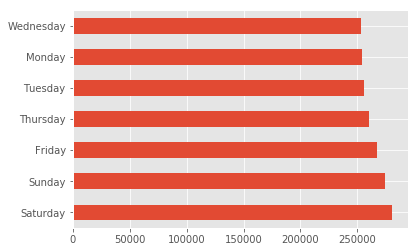

In [36]:
df_columns['Day of the week'].value_counts().plot(kind='barh')
# horizontal bar graph is the best


# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

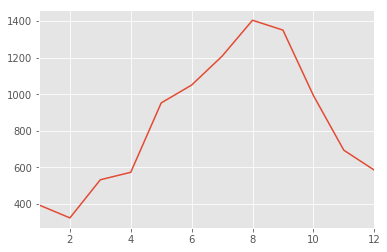

In [37]:
df_columns['Complaint Type'].value_counts() # Homeless
df_columns[df_columns['Complaint Type'].str.contains('Homeless')].index.month.value_counts().sort_index().plot()
# There are more homeless people in the city in the summer


## What holiday(s) are most popular for illegal fireworks?

In [38]:
df_columns['Day in the year'] = df_columns['Created Date'].str.extract(r"(\d\d/\d\d)/\d\d\d\d ", expand=False)
df_columns.head()


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at,Hour of day,AM|PM,Time value,Day of the week,Day in the year
created_at,,,,,,,,,,,,
2015-09-04 10:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54,10,PM,2015-09-04 10:55:25,Friday,09/04
2015-09-04 01:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 06:37:24,01,PM,2015-09-04 01:53:45,Friday,09/04
2015-09-04 09:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 10:32:01,09,PM,2015-09-04 09:15:43,Friday,09/04
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43,01,AM,2015-09-05 01:06:57,Saturday,09/05
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 05:21:18,07,AM,2015-09-04 07:48:25,Friday,09/04


In [39]:
df_columns[df_columns['Complaint Type'].str.contains('Firework')]['Day in the year'].value_counts().head()
# 07/04, Independence Day


07/04    44
07/03    34
07/05    29
07/06    17
07/02    15
Name: Day in the year, dtype: int64

## Plot all kinds of noise complaints on top of each other

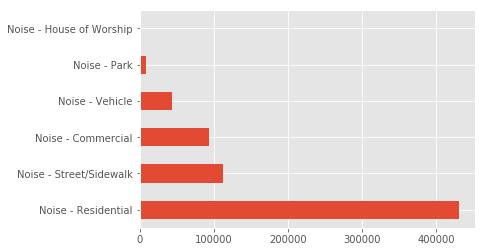

In [40]:
df_columns[df_columns['Complaint Type'].str.contains('Noise')]['Complaint Type'].value_counts().plot(kind='barh')
